# Linear Regression 
### A linear regression is a statistical model used to describe the relationship between a dependent variable, y, and one or more independent variables, X. 
* Continuous output
* The dependent variable is also called the response variable. Independent variables are also called explanatory or predictor variables.
    * X, independent variable is a variable whose value does not change by the effect of other variables and is used to manipulate the dependent variable.
    * Y, dependent variable is a variable whose value change when there is any manipulation in the values of independent variables.
* Types:
  * Simple Linear Regression (draw a line)
  * Multiple Linear Regression (more than one independent variable)
  * Polynomial Linear Regression (draw a curve line)

### Numerical and Categorical Values
<img src="Image/value_type.JPG"  width="600" height="300">

# Application of Linear Regression
* Economic Growth and GDP
* Product price
* Housing sales
* Score prediction

### Examine 2 factors
* Which variables in particular are significant predictors of the variables?
* How significant is the Regression line to make the predictions with highest possible accuracy?

<img src="Image/Linear_Regression.JPG"  width="600" height="300">

### Finding the Best fit line

Minimising the Distance: There are lots of ways to minimize the distance between the line and the data points like Sum of Squared errors, Sum of Absolute errors, Root Mean Square error etc.

<img src="Image/Linear_Regression2.JPG"  width="600" height="300">

### Multiple Linear Regression

<img src="Image/Linear_Regression3.JPG"  width="600" height="300">

### Use case implementation of Linear Regression

<img src="Image/Linear_Regression4.JPG"  width="600" height="300">

### 1. Importing the Libraries

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

### 2. Importing the dataset and extracting the Independent and Dependent variables

In [65]:
companies = pd.read_csv('Data/1000_Companies.csv')
x = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

In [66]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [67]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


### 3. Correlation matrix

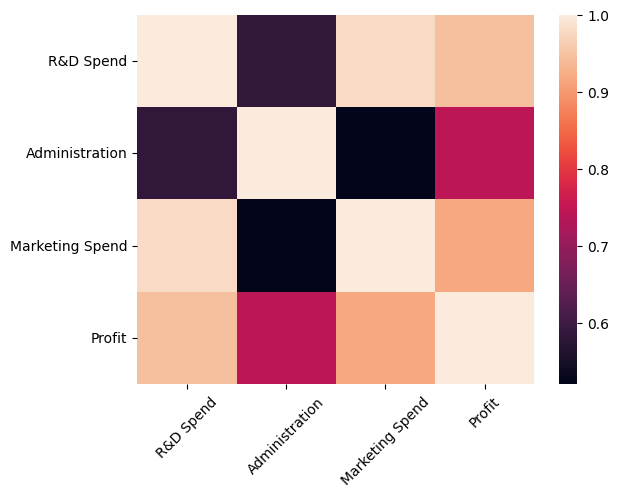

In [80]:
sns.heatmap(companies.corr(numeric_only=True))
plt.xticks(rotation=45)
plt.show()

### 4. Encoding categorical data

In [69]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelEncoder = LabelEncoder()
x[:, 3] = labelEncoder.fit_transform(x[:, 3])

columnTransformer = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
x = columnTransformer.fit_transform(x)

### 5. Avoiding Dummy Variable Trap

In [70]:
# remove the extra column we have when we use the OneHotEncoding
x = x[:, 1:]

### 6. Splitting the data into Train and Test set

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

### 7. Fitting Multiple Linear Regression Model to Training set

In [72]:
from sklearn.linear_model import LinearRegression
model_fit = LinearRegression()
model_fit.fit(x_train, y_train)

LinearRegression()

### 8. Predicting the Test set results

In [73]:
y_pred = model_fit.predict(x_test)
y_pred

array([ 89790.61532916,  88427.07187361,  94894.67836972, 175680.8672561 ,
        83411.73042089, 110571.90200074, 132145.2293644 ,  91473.37719687,
       164597.05380606,  53222.82667402,  66950.1905099 , 150566.43987004,
       126915.20858596,  59337.85971051, 177513.91053061,  75316.28143051,
       118248.14406603, 164574.40699901, 170937.2898107 , 182069.11645084,
       118845.03252689,  85669.95112229, 180992.59396143,  84145.08220145,
       105005.83769214, 101233.56772747,  53831.07669091,  56881.41475225,
        68896.39346905, 210040.00765883, 120778.72270894, 111724.87157654,
       101487.90541518, 137959.02649623,  63969.95996744, 108857.91214126,
       186014.72531987, 171442.64130747, 174644.26529204, 117671.49128195,
        96731.37857434, 165452.25779409, 107724.34331255,  50194.54176914,
       116513.89532179,  58632.48986821, 158416.46827609,  78541.4852161 ,
       159727.66671743, 131137.87699644, 184880.70924515, 174609.08266879,
        93745.66352059,  

### 9. Calculating the Coefficients and Intercepts

In [74]:
# slopes
print(model_fit.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [75]:
# constants
print(model_fit.intercept_)

-51035.22972403464


### 10. Evaluating the model

In [76]:
# calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9112695892268834

In [79]:
# calculating the RMSE value
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

13861.748151480488

R squared value of 0.91 proves the model is a good model

R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).It ranges from 0 to 1, with higher values indicating a better fit.

Loss function (calculate error (residual)): 

Root mean squared error (RMSE) measures the average difference between the predicted values and the actual values. Lower RMSE indicates better model performance, as it means the model's predictions are closer to the actual values.

RMSE focuses on the prediction accuracy, while R2 focuses on the goodness of fit.